In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

ModuleNotFoundError: No module named 'pandas'

In [4]:
df = pd.read_csv("../data/sorted_new.csv")

NameError: name 'pd' is not defined

In [1]:
df.shape

NameError: name 'df' is not defined

In [72]:
df.head()

,index,ConversationId,ConversationInitiated,ConversationDate,ConversationEndedBy,Id,Initiated,Event,Text,ParticipantId,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText
0,158,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,SYSTEM,5c2dc90bf92dde6e0d63c99b,1546504459078,Timeout,NaN,SYSTEM,System,NaN,NaN,True,NaN,NaN
1,825,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,SYSTEM,5c2d2042f92dde6e0d623bc7,1546461250000,NaN,U tell me im junior,7605202845,Visitor,43209078.0,43209078.0,True,NaN,U tell me im junior
2,6,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2f9f3a680e5af70640a20c,1546624826051,Timeout,NaN,SYSTEM,System,NaN,NaN,True,NaN,NaN
3,13,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee93e3e1b9890052f246c,1546578238531,NaN,Hi,8168241807,Visitor,29072.0,29072.0,True,29072.0,Hi
4,14,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee95b3e1b9890052f247a,1546578267599,Joined,NaN,DQVCTWMS5aaaaN,Agent,NaN,NaN,True,NaN,NaN


In [73]:
df.describe()

,index,ConversationInitiated,Initiated,QueueDuration,Duration,VisitorWait
count,57377.000000,5.737700e+04,5.737700e+04,7.633000e+03,4.550400e+04,1.881600e+04
mean,28688.000000,1.554190e+12,1.554198e+12,2.298084e+07,7.754279e+06,7.520894e+05
std,16563.457535,4.160288e+09,4.160676e+09,2.128390e+07,1.646402e+07,3.351293e+06
min,0.000000,1.546461e+12,1.546461e+12,6.033000e+03,0.000000e+00,1.040000e+02
25%,14344.000000,1.550632e+12,1.550634e+12,1.373290e+05,3.279350e+04,3.498350e+04
50%,28688.000000,1.553842e+12,1.553877e+12,3.187446e+07,8.525250e+04,7.920050e+04
75%,43032.000000,1.557960e+12,1.557968e+12,4.320833e+07,5.203348e+05,1.953858e+05
max,57376.000000,1.561934e+12,1.561977e+12,1.061509e+08,1.064126e+08,4.314438e+07


In [74]:
df.shape

(57377, 16)

In [34]:
def plot_histogram(df: pd.DataFrame, col_name: str):
    """
    Plots a histogram of a given for a dataframe

    Parameters:
        df (pandas DataFrame): dataframe containing columns with numeric types
        col_name (str): the name of the column that will have its histogram plotted

    Returns:
        Displays a histogram of the specified column
    """
    plt.hist(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.title(f'{col_name} Distribution')

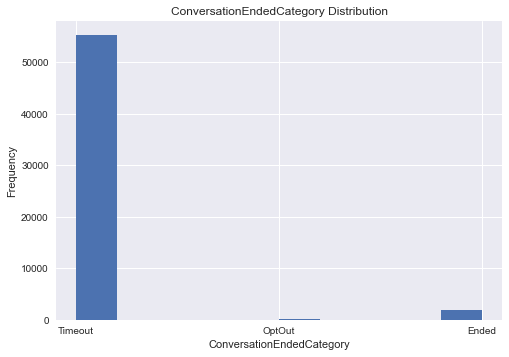

In [38]:
plot_histogram(df, "ConversationEndedCategory")

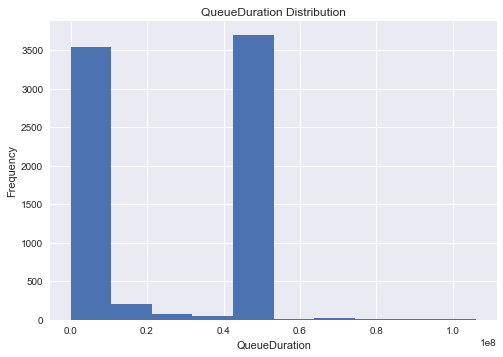

In [39]:
plot_histogram(df, "QueueDuration")

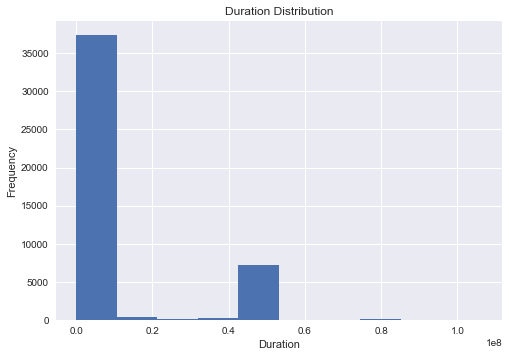

In [40]:
plot_histogram(df, "Duration")

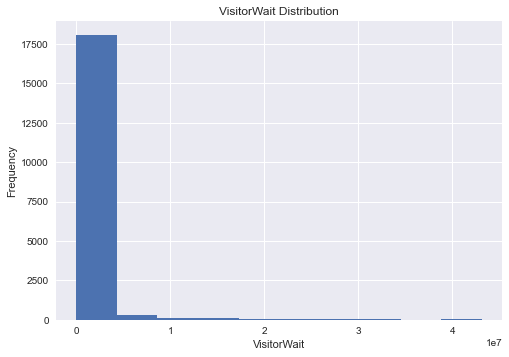

In [41]:
plot_histogram(df, "VisitorWait")

<AxesSubplot:xlabel='ParticipantRole'>

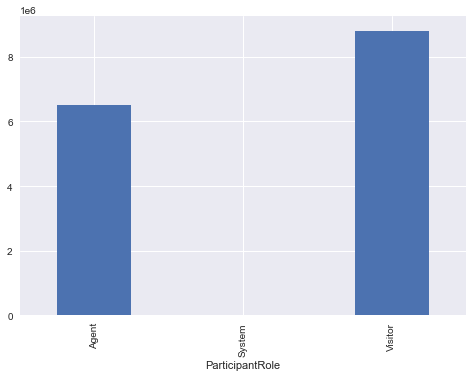

In [43]:
df.groupby('ParticipantRole')['Duration'].mean().plot.bar()

In [44]:
df['ParticipantRole']

0         System
1        Visitor
2         System
3        Visitor
4          Agent
          ...   
57372    Visitor
57373    Visitor
57374     System
57375    Visitor
57376     System
Name: ParticipantRole, Length: 57377, dtype: object

In [45]:
df.isnull().mean()

ConversationId               0.000000
ConversationInitiated        0.000000
ConversationDate             0.000000
ConversationEndedCategory    0.000000
Id                           0.000000
Initiated                    0.000000
Event                        0.796800
Text                         0.206930
MMS                          0.000000
Group                        0.000000
ParticipantId                0.000000
ParticipantRole              0.000000
QueueDuration                0.866968
Duration                     0.206930
Abandoned                    0.000000
VisitorWait                  0.672064
AnyText                      0.206930
dtype: float64

<AxesSubplot:xlabel='ParticipantRole'>

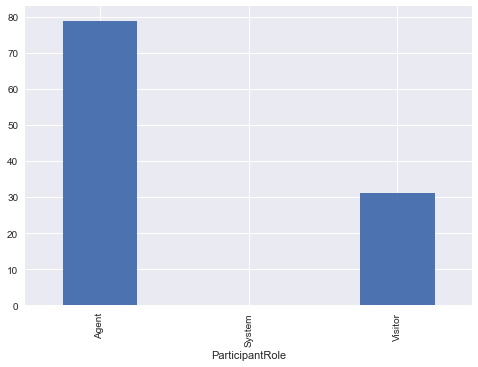

In [47]:
df.AnyText.str.len().groupby(df.ParticipantRole).mean().plot.bar()

In [50]:
df['ConversationDate'] =  pd.to_datetime(df['ConversationDate'])

In [51]:
df.head()

,ConversationId,ConversationInitiated,ConversationDate,ConversationEndedCategory,Id,Initiated,Event,Text,MMS,Group,ParticipantId,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText
0,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,Timeout,5c2dc90bf92dde6e0d63c99b,1546504459078,Timeout,NaN,0,59c04b7370b15a5f68a5aab0,SYSTEM,System,NaN,NaN,True,NaN,NaN
1,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,Timeout,5c2d2042f92dde6e0d623bc7,1546461250000,NaN,U tell me im junior,0,59c04b7370b15a5f68a5aab0,7605202845,Visitor,43209078.0,43209078.0,True,NaN,U tell me im junior
2,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,Timeout,5c2f9f3a680e5af70640a20c,1546624826051,Timeout,NaN,0,5884f9756e14e3535fdea949,SYSTEM,System,NaN,NaN,True,NaN,NaN
3,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,Timeout,5c2ee93e3e1b9890052f246c,1546578238531,NaN,Hi,0,5884f9756e14e3535fdea949,8168241807,Visitor,29072.0,29072.0,True,29072.0,Hi
4,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,Timeout,5c2ee95b3e1b9890052f247a,1546578267599,Joined,NaN,0,5884f9756e14e3535fdea949,DQVCTWMS5aaaaN,Agent,NaN,NaN,True,NaN,NaN


In [52]:
df.dtypes

ConversationId                       object
ConversationInitiated                 int64
ConversationDate             datetime64[ns]
ConversationEndedCategory            object
Id                                   object
Initiated                             int64
Event                                object
Text                                 object
MMS                                   int64
Group                                object
ParticipantId                        object
ParticipantRole                      object
QueueDuration                       float64
Duration                            float64
Abandoned                              bool
VisitorWait                         float64
AnyText                              object
dtype: object

<AxesSubplot:xlabel='ConversationDate'>

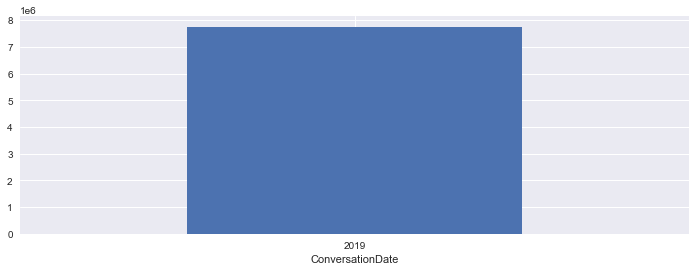

In [56]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["ConversationDate"].dt.year)["Duration"].mean().plot(
     kind='bar', rot=0, ax=axs
)

In [57]:
df[(df['ConversationDate'] > '2020-01-01')]

,ConversationId,ConversationInitiated,ConversationDate,ConversationEndedCategory,Id,Initiated,Event,Text,MMS,Group,ParticipantId,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText


In [58]:
df.shape

(57377, 17)

In [63]:
test = pd.read_csv("/Users/mani/Desktop/epik-project-nlp/data/Epik_2020A.csv")

In [64]:
test.shape

(42455, 32)